In [3]:
# Step 1: Import libraries
import pandas as pd
from sklearn.decomposition import PCA
import joblib

# Step 2: Load the 768D embeddings file
df = pd.read_csv("/content/comment_embeddings_768D.csv")

# Step 3: Extract only the embedding columns and drop rows with NaNs
embedding_data = df.iloc[:, 0:768].dropna()

# Step 3.1: Also filter other columns to match remaining indices
filtered_df = df.loc[embedding_data.index].reset_index(drop=True)
embedding_data = embedding_data.reset_index(drop=True)

# Step 4: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embedding_data)

# Step 5: Store the reduced embeddings
df_reduced = pd.DataFrame(reduced_embeddings, columns=["PCA1", "PCA2"])
df_reduced['token_ticker'] = filtered_df['token_ticker']
df_reduced['user_name'] = filtered_df['user_name']
df_reduced['comment_id'] = filtered_df['comment_id']

# Step 6: Save results and model
df_reduced.to_csv("reduced_embeddings_2D.csv", index=False)
joblib.dump(pca, "pca_model_2D.pkl")
print("✅ PCA complete and saved!")

✅ PCA complete and saved!


Silhouette Score for k=2: 0.3865249194415501
Silhouette Score for k=3: 0.46713204016457543
Silhouette Score for k=4: 0.39639599047078466
Silhouette Score for k=5: 0.3730477992804946
Silhouette Score for k=6: 0.36271317899077377
Silhouette Score for k=7: 0.3537454702702796
Silhouette Score for k=8: 0.34222569183912976
Silhouette Score for k=9: 0.3460554189012763


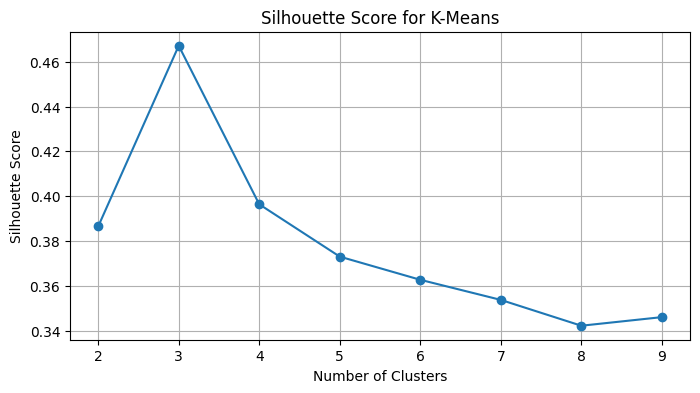

✅ Clustering complete! Saved as reduced_embeddings_with_clusters.csv


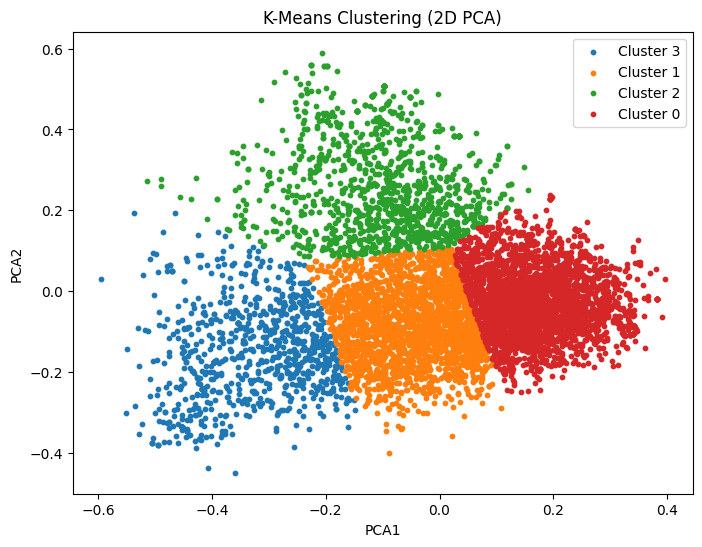

In [4]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Step 2: Load the 2D reduced embeddings
df = pd.read_csv("/content/reduced_embeddings_2D.csv")

# Step 3: Extract the PCA columns
X = df[['PCA1', 'PCA2']]

# ----------- Option 1: K-Means Clustering -----------
# Try with a range of clusters and find optimal using silhouette
sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print(f"Silhouette Score for k={k}: {score}")

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), sil_scores, marker='o')
plt.title("Silhouette Score for K-Means")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Let's assume k=4 is best (or choose based on plot)
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster_kmeans'] = kmeans.fit_predict(X)

# ----------- Option 2: DBSCAN -----------
# eps and min_samples need to be tuned based on your data
dbscan = DBSCAN(eps=1.5, min_samples=10)
df['cluster_dbscan'] = dbscan.fit_predict(X)

# Step 4: Save the clustered data
df.to_csv("reduced_embeddings_with_clusters.csv", index=False)
print("✅ Clustering complete! Saved as reduced_embeddings_with_clusters.csv")

# Step 5: Optional - Visualize K-Means clusters
plt.figure(figsize=(8, 6))
for label in df['cluster_kmeans'].unique():
    subset = df[df['cluster_kmeans'] == label]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f"Cluster {label}", s=10)
plt.title("K-Means Clustering (2D PCA)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()
